We covered last class that all comparison-based sorting algorithms have worst-case runtime in $\Omega (n \log n)$.

However, this is limited to scenarios where we know absolutely nothing about the input array except the fact that the elements can be compared.

If we have additional information about the array, then it may be possible to exploit this and design a sorting algorithm with better worst-case runtime.

For example, if we know that the array is mostly sorted (e.g., only $\Theta (1)$ elements are out of place), then InsertionSort will achieve a runtime of $\Theta (n)$.

In [ ]:
# Suppose I know that my array only contains bits, i.e.,
# every element is either 0 or 1

def sortbinaryarray (lst):
  cnt = 0
  for elem in lst:
    if elem == 0:
      cnt += 1
  out = [0] * cnt + [1] * (len (lst) - cnt)
  return out

lst = [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]
srt = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
print (sortbinaryarray (lst))

# Runtime: Theta (n)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# What if each element had three possible values?
# We could do something similar but add an additional
# counter variable, e.g., to count the 1s as well

# More generally, what if we have k possible values
# Specifically, every element of the array is in the
# range 0 to k-1 inclusive

def preCountSort (lst, k):
  # we need counters for each possible value
  # as there are k values, we can simply make an array of size k
  cnt = [0] * k

  for elem in lst:    # for each element we find
    cnt[elem] += 1    # increase its corresponding counter

  out = []
  for i in range (k):
    out += [i] * cnt[i]
  return out

# example with k = 5
lst = [2, 2, 1, 3, 0, 4, 3, 2, 3, 0, 4, 0, 0, 1, 4, 3]

print (preCountSort (lst, 5))

[0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4]


This is not actually considered a sorting algorithm, because the output array is not actually constructed using elements from the input array.

In practice, when we sort an array of elements, each element usually has many different kinds of data, even though we only want to sort based on one specific data value (which we refer to as the key). So when we sort the array, we want the entire elements to be rearranged based on the key, as opposed to creating a new array that only contains the keys in sorted order.

We modify the sorting algorithm above to construct the output using the elements of the input. To do this, we can prepare the output array beforehand and "reserve" indices to specific keys by maintaining a position array, where $P[i]$ indicates which index of the output array we should start having elements with key $i$.

How to initialize P: $P[0]$ should always be 0, because the smallest key should start from index 0 of the output. After that, $P[i] \leftarrow P[i - 1] + C[i - 1]$, where $C$ is the count array, since the previous key $i - 1$ started its reservation at index $P[i - 1]$ and reserved $C[i - 1]$ spots, so the next available spot should be at $P[i - 1] + C[i - 1]$.

Once we construct the $P$ array and the initially empty output array, we can revisit the input array again. For each element, we check the $P$ array with the key to determine which index of the output this element should go, and place it accordingly. We also increment the $P$ value so that future elements with the same key go to the next indices.

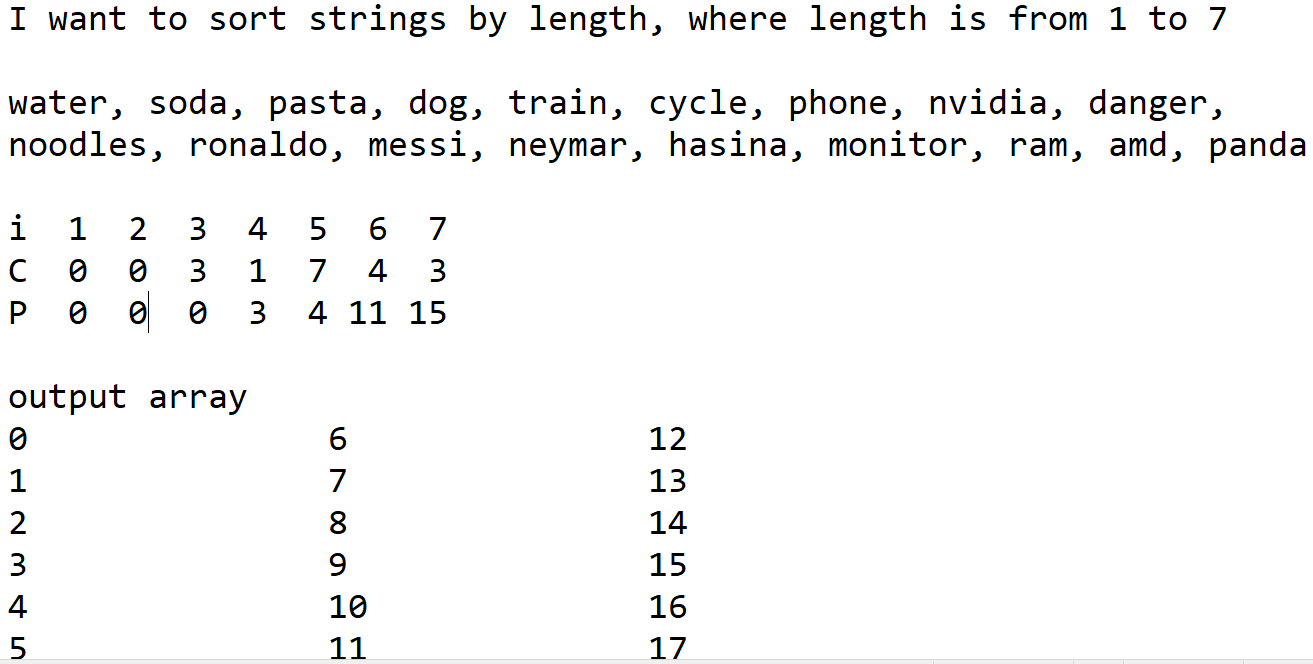

Final State

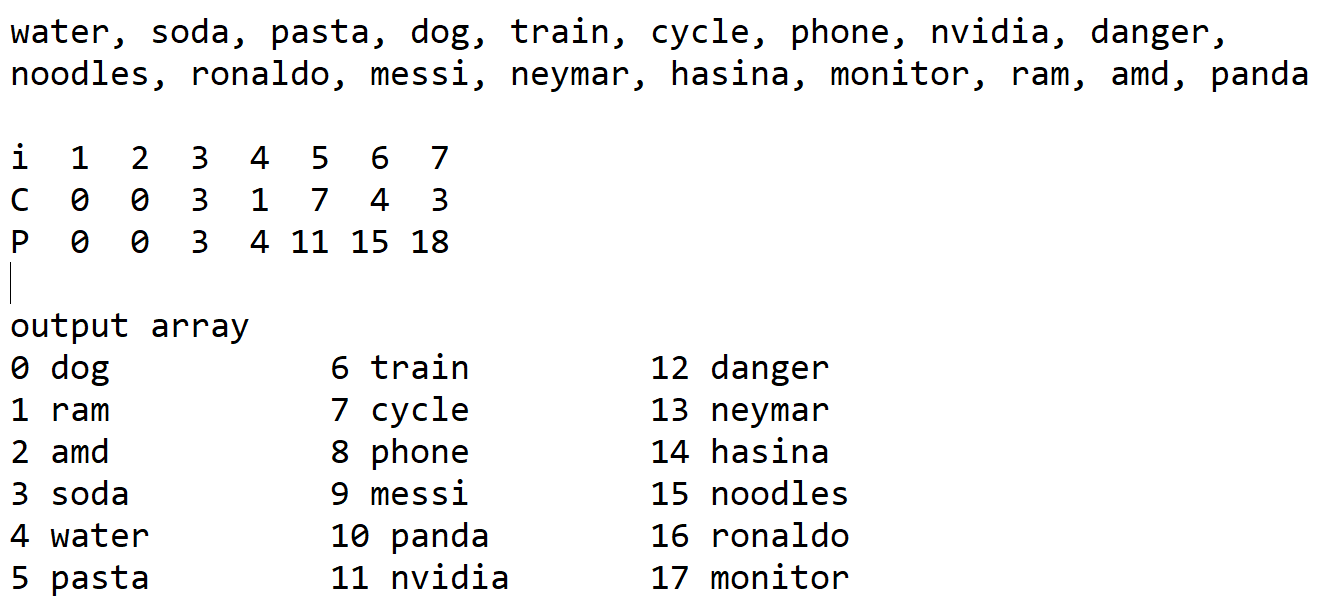

In [ ]:
def countSort (lst, k):
  cnt = [0] * k
  for elem in lst:
    cnt[elem] += 1

  # prepare position array
  P = [0] * k
  for i in range (1, k):
    P[i] = P[i - 1] + cnt[i - 1]

  # prepare output array and fill
  out = [None] * len (lst)
  for elem in lst:
    idx = P[elem]
    out[idx] = elem
    P[elem] += 1

  return out

# example with k = 5
lst = [2, 2, 1, 3, 0, 4, 3, 2, 3, 0, 4, 0, 0, 1, 4, 3]

print (countSort (lst, 5))

[0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4]


In [8]:
# if we sort strings by length, then the key for each
# string is its length
def countSortStringsByLength (lst, k):
  cnt = [0] * k
  for elem in lst:
    cnt[len (elem)] += 1      # cnt is based on key

  P = [0] * k
  for i in range (1, k):
    P[i] = P[i - 1] + cnt[i - 1]

  out = [None] * len (lst)
  for elem in lst:
    idx = P[len (elem)]       # consult P array using key
    out[idx] = elem         # no change; move ENTIRE element
    P[len (elem)] += 1        # update P array using key
    #print (out)

  return out

stringlst = ["water", "soda", "pasta", "dog",
             "train", "cycle", "phone", "nvidia",
             "danger", "noodles", "ronaldo", "messi",
             "neymar", "hasina", "monitor", "ram",
             "amd", "panda"]
print (countSortStringsByLength (stringlst, 8))

['dog', 'ram', 'amd', 'soda', 'water', 'pasta', 'train', 'cycle', 'phone', 'messi', 'panda', 'nvidia', 'danger', 'neymar', 'hasina', 'noodles', 'ronaldo', 'monitor']


Runtime Analysis of CountSort: $\Theta (n + k)$ for all cases, where $n$ is the size of the input array, and $k$ is the number of possible values that each key can have.

Space Complexity: $\Theta (n + k)$ for all cases

Note that CountSort should be applied for arrays where every key is known to be from $0$ to $k - 1$. It can be extended to any scenario where every key has exactly $k$ possibilities, and each possible value is known beforehand, so we can convert the keys into indices from $0$ to $k - 1$.

**Stability:** A stable sorting algorithm is one which ensures that elements with the same key will remain in the same relative order, e.g., in the example above, dog is placed before ram, which is placed before amd, because they have the same length and the output will therefore preserve the original order in the input.

An unstable sorting algorithm may change the order of elements that have the same key.

CountSort, MergeSort, InsertionSort, and BubbleSort are all stable

QuickSort is not stable

RADIXSORT

We consider sorting elements that have a "radix" structure.

What do we mean by radix structure?

Every element can be expressed as a sequence of components, where comparing two elements is equivalent to comparing the first component in which the sequences differ. For example, integers can be expressed as a sequence of digits and the radix structure applies when the integers have the same length. Strings can be expressed as a sequence of characters and the radix structure applies (even if the length is not the same).

In order to use LSD-RadixSort, there are two conditions:

*  The elements follow a radix structure, as described above
*  The lengths are all the same. If needed, we can pad the elements carefully to ensure they are the same length (e.g., add leading 0s for integers, add blank spaces at the end for strings, etc)

How to perform RadixSort: simply sort all elements using a stable sorting algorithm based on the last radix-component first, then the second-to-last radix-component, and so on. For example, with integers, sort by last digit, then second-to-last digit, etc

In [ ]:
# suppose we want to sort strings of length d

def radixSort (lst, d):
  for i in range (d - 1, -1, -1): # i = d - 1, d - 2, ..., 2, 1, 0
    sort lst by index i ONLY

stringlst = ["water", "dance", "pasta", "fairy",
             "train", "cycle", "phone", "clock",
             "glock", "grass", "pizza", "messi",
             "jumbo", "money", "honey", "colon",
             "alone", "panda"]

In [10]:
def get (st):
  return st[idx]

def radixSort (lst, d):
  for i in range (d - 1, -1, -1): # i = d - 1, d - 2, ..., 2, 1, 0
    global idx
    idx = i
    lst.sort (key = get)

stringlst = ["water", "dance", "pasta", "fairy",
             "train", "cycle", "phone", "clock",
             "glock", "grass", "pizza", "messi",
             "jumbo", "money", "honey", "colon",
             "alone", "panda"]

print (stringlst)
radixSort (stringlst, 5)
print (stringlst)

['water', 'dance', 'pasta', 'fairy', 'train', 'cycle', 'phone', 'clock', 'glock', 'grass', 'pizza', 'messi', 'jumbo', 'money', 'honey', 'colon', 'alone', 'panda']
['alone', 'clock', 'colon', 'cycle', 'dance', 'fairy', 'glock', 'grass', 'honey', 'jumbo', 'messi', 'money', 'panda', 'pasta', 'phone', 'pizza', 'train', 'water']


In [12]:
def radixSort (lst, d):
  for i in range (d - 1, -1, -1): # i = d - 1, d - 2, ..., 2, 1, 0
    lst.sort (key = lambda x: x[i])

stringlst = ["water", "dance", "pasta", "fairy",
             "train", "cycle", "phone", "clock",
             "glock", "grass", "pizza", "messi",
             "jumbo", "money", "honey", "colon",
             "alone", "panda"]

print (stringlst)
radixSort (stringlst, 5)
print (stringlst)

['water', 'dance', 'pasta', 'fairy', 'train', 'cycle', 'phone', 'clock', 'glock', 'grass', 'pizza', 'messi', 'jumbo', 'money', 'honey', 'colon', 'alone', 'panda']
['alone', 'clock', 'colon', 'cycle', 'dance', 'fairy', 'glock', 'grass', 'honey', 'jumbo', 'messi', 'money', 'panda', 'pasta', 'phone', 'pizza', 'train', 'water']


Using RadixSort requires another stable sorting algorithm to sort the elements based on only one digit. Regardless of which auxiliary digit-sorting algorithm we use, the entire process is still called RadixSort. The choice of the digit-sorting algorithm will affect the runtime and space complexity.

Runtime Analysis: $\Theta (d \times \text{Runtime of digit-sorting algorithm})$

Space Complexity: $\Theta (\text{Auxiliary space of digit-sorting algorithm})$

In most scenarios, the popular choice for the digit-sorting algorithm is CountSort. In that case, the runtime becomes $\Theta (d(n + R))$ and the space complexity becomes $\Theta (n + R)$, where $R$ is the number of possible values for each digit. For integers, this is equivalent to the base we are representing. For strings, $R$ is the size of the alphabet.

Sometimes, we may consider using a different base instead of base-10. In general, if we have $d$ digits and we are using base-$R$, we can express integers from $0$ to $R^d - 1$.

Alternatively, if our largest integer is $M$ and we are using base-$R$, then the number of digits we need is around $\log_R (M)$.

In general, increasing $R$ will decrease $d$ and vice versa, so we should try to find a good balance where $\Theta (d(n + R))$ is small.